# Amazon review scraping and text mining

In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [43]:
!pip install Textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [50]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
link = 'https://www.amazon.in/Theory-Everything-Stephen-Hawking/product-reviews/8179925919/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [20]:
page = requests.get(link)


In [21]:
page


<Response [200]>

In [22]:
page.content


b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,0

In [23]:
soup = bs(page.content,'html.parser')


In [24]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Good Book</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Very small letters, which makes it uncomfortable</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Honestly , I say that this book is best that I have ever read.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Tbh really I loved this book n honestly I want to buy more books by stephen hawking bc its amazing, n the only thing I didn't like was that I think pages should've been a bit more bright otherwise its really good.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Best book</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>The book contains brief

In [26]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\nGood Book\n',
 '\nVery small letters, which makes it uncomfortable\n',
 '\nHonestly , I say that this book is best that I have ever read.\n',
 "\nTbh really I loved this book n honestly I want to buy more books by stephen hawking bc its amazing, n the only thing I didn't like was that I think pages should've been a bit more bright otherwise its really good.\n",
 '\nBest book\n',
 '\nThe book contains brief introduction to the important concepts of universe. It starts with a chapter on previous ideas about universe dating back to Aristotle and how we came to our current understanding of universe. Then it deals with the idea of a expanding universe and big bang. Later chapters consists of ideas on black holes, origin of universe and a quest for the ultimate unified theory of everything.I would be honest and admit that I couldn\'t fully understand some concepts that are explained in book but even after that I thoroughly enjoyed it. It is very difficult to write a book on scientific co

In [27]:
review_content[:] = [reviews.strip() for reviews in review_content]
review_content

['Good Book',
 'Very small letters, which makes it uncomfortable',
 'Honestly , I say that this book is best that I have ever read.',
 "Tbh really I loved this book n honestly I want to buy more books by stephen hawking bc its amazing, n the only thing I didn't like was that I think pages should've been a bit more bright otherwise its really good.",
 'Best book',
 'The book contains brief introduction to the important concepts of universe. It starts with a chapter on previous ideas about universe dating back to Aristotle and how we came to our current understanding of universe. Then it deals with the idea of a expanding universe and big bang. Later chapters consists of ideas on black holes, origin of universe and a quest for the ultimate unified theory of everything.I would be honest and admit that I couldn\'t fully understand some concepts that are explained in book but even after that I thoroughly enjoyed it. It is very difficult to write a book on scientific concept and explain it w

In [28]:
df = pd.DataFrame()


In [29]:
df['Text']=review_content
df

,Text
0,Good Book
1,"Very small letters, which makes it uncomfortable"
2,"Honestly , I say that this book is best that I..."
3,Tbh really I loved this book n honestly I want...
4,Best book
5,The book contains brief introduction to the im...
6,Good book for science students
7,"Most people know who Hawking is, and what his ..."
8,Amazing book
9,The media could not be loaded.\n ...


In [30]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

the         28
of          21
to          18
and         13
a           13
book        12
is           9
it           9
I            8
that         8
for          6
what         5
in           5
be           5
on           5
universe     5
Hawking      5
our          4
have         4
we           4
dtype: int64

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [33]:
df['Text']

0                                            Good Book
1              Very small letters, makes uncomfortable
2              Honestly , I say book best I ever read.
3    Tbh really I loved book n honestly I want buy ...
4                                            Best book
5    The book contains brief introduction important...
6                           Good book science students
7    Most people know Hawking is, contributions wor...
8                                         Amazing book
9                 The media could loaded. Best range🔥🔥
Name: Text, dtype: object

In [ ]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

In [34]:
df.shape


(10, 1)

In [35]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq


book             12
I                 8
Hawking           5
universe          5
understand        4
concepts          3
science           3
The               3
reader            3
like              3
read.             3
quest             2
theory            2
unified           2
ultimate          2
current           2
understanding     2
ideas             2
It                2
universe.         2
dtype: int64

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [38]:
df['Text']

0                                            Good Book
1              Very small letters, makes uncomfortable
2              Honestly , I say book best I ever read.
3    Tbh really I loved book n honestly I want buy ...
4                                            Best book
5    The book contains brief introduction important...
6                           Good book science students
7    Most people know Hawking is, contributions wor...
8                                         Amazing book
9                 The media could loaded. Best range🔥🔥
Name: Text, dtype: object

In [39]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

book             12
I                 8
Hawking           5
universe          5
understand        4
concepts          3
science           3
The               3
reader            3
like              3
read.             3
quest             2
theory            2
unified           2
ultimate          2
current           2
understanding     2
ideas             2
It                2
universe.         2
dtype: int64

In [44]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])


In [45]:
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,Text,subjectivity,polarity
0,Good Book,0.600000,0.700000
1,"Very small letters, makes uncomfortable",0.760000,-0.412500
2,"Honestly , I say book best I ever read.",0.600000,0.800000
3,Tbh really I loved book n honestly I want buy ...,0.800000,0.660000
4,Best book,0.300000,1.000000
5,The book contains brief introduction important...,0.546569,0.076471
6,Good book science students,0.600000,0.700000
7,"Most people know Hawking is, contributions wor...",0.379010,0.155482
8,Amazing book,0.900000,0.600000
9,The media could loaded. Best range🔥🔥,0.300000,1.000000


## The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive. The subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, or even judgment. The higher the number, the more subjective the text is.

### Creating a word cloud

In [51]:
from wordcloud import WordCloud, STOPWORDS

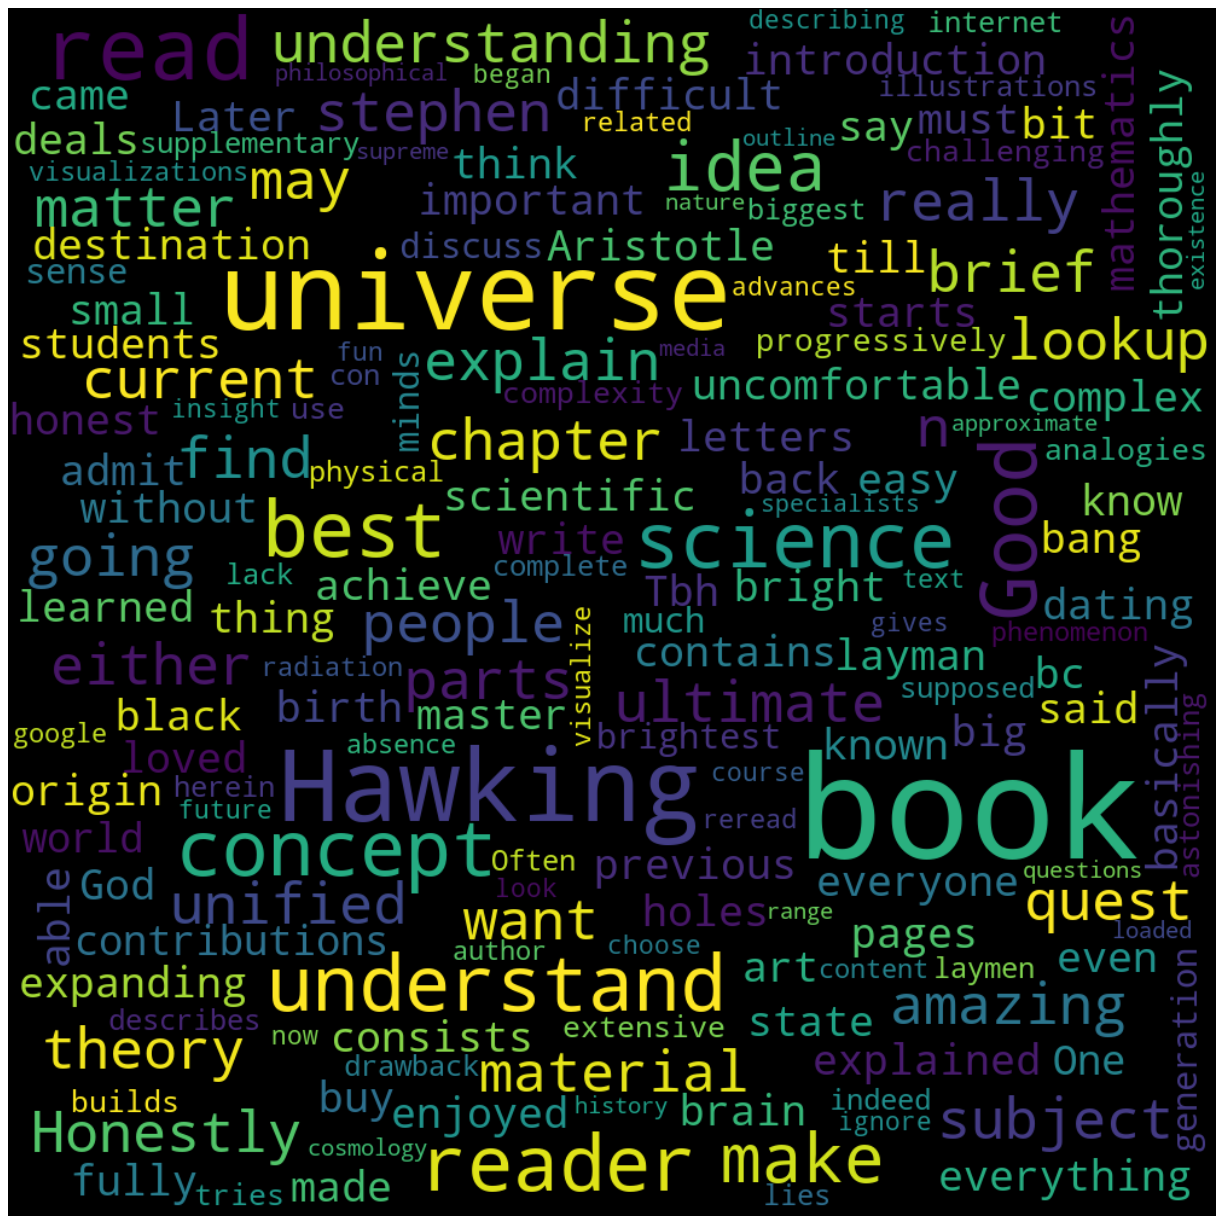

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [53]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    

In [54]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,Text,subjectivity,polarity,analysis
0,Good Book,0.600000,0.700000,Positive
1,"Very small letters, makes uncomfortable",0.760000,-0.412500,Negative
2,"Honestly , I say book best I ever read.",0.600000,0.800000,Positive
3,Tbh really I loved book n honestly I want buy ...,0.800000,0.660000,Positive
4,Best book,0.300000,1.000000,Positive
5,The book contains brief introduction important...,0.546569,0.076471,Positive
6,Good book science students,0.600000,0.700000,Positive
7,"Most people know Hawking is, contributions wor...",0.379010,0.155482,Positive
8,Amazing book,0.900000,0.600000,Positive
9,The media could loaded. Best range🔥🔥,0.300000,1.000000,Positive


In [55]:
### Displaying the positive and negative reviews
positive_reviews = df[df['analysis'] == 'Positive']
negative_reviews = df[df['analysis'] == 'Negative']

print('positive Reviews')
for i, row in positive_reviews[:5].iterrows():
  print(' -' + row['Text'])

print('negative Reviews')
for i, row in negative_reviews[:5].iterrows():
  print(' -' + row['Text'])

positive Reviews
 -Good Book
 -Honestly , I say book best I ever read.
 -Tbh really I loved book n honestly I want buy books stephen hawking bc amazing, n thing I like I think pages bit bright otherwise really good.
 -Best book
 -The book contains brief introduction important concepts universe. It starts chapter previous ideas universe dating back Aristotle came current understanding universe. Then deals idea expanding universe big bang. Later chapters consists ideas black holes, origin universe quest ultimate unified theory everything.I would honest admit I fully understand concepts explained book even I thoroughly enjoyed it. It difficult write book scientific concept explain without complex mathematics. Stephen Hawking master art. He made concepts easy understand layman.The book must read everyone basically understand learned till universe going here. The quest unified theory explain universe birth current state going ultimate destination. As Hawking said able achieve "We would know

### Most of the reviews are positive or negative?

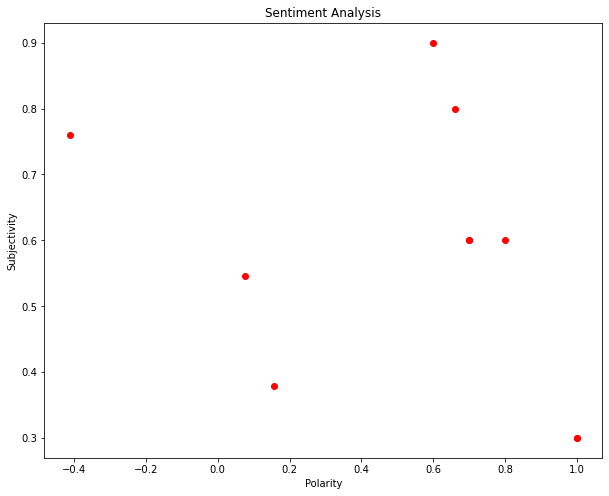

In [56]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [60]:
len(positive_reviews) / len(negative_reviews)


9.0

## The book has mostly positive reviews compared to negative onces